# Time Series Things

In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

# Custom package
sys.path.append('/home/rrp000/sea_ice/code/')
from icepack import get_dataset
from icepack.analysis import *

# Some useful lists and dicts
monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

# Open the datasets and compute SIE

In [2]:
method = 'mean'
daterange = (2007,2019)
daterange_clim = (2007,2019)

grid_path = "~/sea_ice/data/grids/grid_1x1.nc"
grid = xr.open_dataset(grid_path)

grid_path2 = "~/sea_ice/data/grids/nsidc_grid.nc"
grid2 = xr.open_dataset(grid_path2)

### Had2CIS observations

In [3]:
# open data
sic = get_dataset('Had2CIS')

# calculate SIA and anomalies
sia_Had2CIS = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='sicn', lat_label='lat', lon_label='lon', ensemble=None)
sia_anom_Had2CIS = get_anomalies(sia_Had2CIS,'SIA',ref_period=daterange)
sia_clim_Had2CIS = get_climatology(sia_Had2CIS,var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


#### OSI-SAF Observations

In [10]:
sic = get_dataset('OSI-SAF')

# calculate SIE and anomalies
sia_OSISAF = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='ice_conc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2)
sia_anom_OSISAF = get_anomalies(sia_OSISAF,'SIA',ref_period=daterange)
sia_clim_OSISAF = get_climatology(sia_OSISAF,var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### NSIDC 

In [6]:
# open data
sic = get_dataset('NSIDC')

# calculate SIE and anomalies
sia_NSIDC = get_icearea(sic, grid2, lat_bounds=(-90,0), sic_label='cdr_seaice_conc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1)
sia_anom_NSIDC = get_anomalies(sia_NSIDC,'SIA',ref_period=daterange)
sia_clim_NSIDC = get_climatology(sia_NSIDC,var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 Wind-Nudged

In [5]:
# open data
sic = get_dataset('CanESM5.1_nw_1950_sic')

# calculate SIA
sia_CanESM5_wn1950 = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2).load()
sia_anom_CanESM5_wn1950 = get_anomalies(sia_CanESM5_wn1950,'SIA',ref_period=daterange)
sia_clim_CanESM5_wn1950 = get_climatology(sia_CanESM5_wn1950, var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


In [6]:
# open data
sic = get_dataset('CanESM5.1_nw_1990_sic')
# calculate SIA
sia_CanESM5_wn1990 = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2).load()
sia_anom_CanESM5_wn1990 = get_anomalies(sia_CanESM5_wn1990,'SIA',ref_period=daterange)
sia_clim_CanESM5_wn1990 = get_climatology(sia_CanESM5_wn1990, var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 Wind+T Nudged

In [7]:
# open data
sic = get_dataset('CanESM5.1_nwt_1950_sic')
grid = xr.open_dataset(grid_path)

# calculate SIA
sia_CanESM5_wtn1950 = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2).load()
sia_anom_CanESM5_wtn1950 = get_anomalies(sia_CanESM5_wtn1950,'SIA',ref_period=daterange)
sia_clim_CanESM5_wtn1950 = get_climatology(sia_CanESM5_wtn1950, var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 initialized

In [8]:
# CELL TAKES ~1 MINUTE TO RUN

# open data and format time
sic_CanESM5_init = get_dataset('CanESM5.0_i')
sic_CanESM5_init = [format_time_coord(data,f'1981-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_CanESM5_init)]

# calculate SIA (ensemble mean) and SIA anomalies
print("Calculating SIA")
sia_CanESM5_init = []
for i,sic in enumerate(sic_CanESM5_init):
    sia_CanESM5_init.append(get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2))
sia_anom_CanESM5_init = [get_anomalies(sia,'SIA',ref_period=daterange) for sia in sia_CanESM5_init]

# add a lead time coordinate to the SIA data set
print("Adding a lead time coordinate")
for i in range(len(sia_CanESM5_init)):
    im = i + 1
    sia_CanESM5_init[i]['lead'] = (sia_CanESM5_init[i]['time.month'] - im)%12
    sia_anom_CanESM5_init[i]['lead'] = (sia_anom_CanESM5_init[i]['time.month'] - im)%12

# re-sort by leadtime
sia_CanESM5_init_lt = [xr.merge([sia_CanESM5_init[im-1].where(sia_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_anom_CanESM5_init_lt = [xr.merge([sia_anom_CanESM5_init[im-1].where(sia_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sia_clim_CanESM5_init = [get_climatology(sia,var='SIA',ref_period=daterange_clim) for sia in sia_CanESM5_init_lt]

Calculating SIA


/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.

Adding a lead time coordinate


### CanESM5 Jan-Initialized w/ W Nudge

In [9]:
# open data, each file corresponding to one ENSEMBLE
sic_CanESM5_wn2016_init = [get_dataset('CanESM5.1_inw_sic')[i].drop_dims('bnds') for i in range(9)]

# concatenate each ensemble
sic_CanESM5_wn2016_init = xr.concat(sic_CanESM5_wn2016_init,dim='ensemble')

# calculate SIA
sia_CanESM5_wn2016_init = get_icearea(sic_CanESM5_wn2016_init, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2).load()
sia_anom_CanESM5_wn2016_init = get_anomalies(sia_CanESM5_wn2016_init,'SIA',ref_period=daterange,ref_dataset=sia_CanESM5_wn1950)
sia_clim_CanESM5_wn2016_init = get_climatology(sia_CanESM5_wn2016_init, var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 Jan-Initialized w/ W+T Nudge

In [10]:
sic_CanESM5_wtn2016_init = [get_dataset('CanESM5.1_inwt_sic')[i].drop_dims('bnds') for i in range(9)]

# concatenate each ensemble
sic_CanESM5_wtn2016_init = xr.concat(sic_CanESM5_wtn2016_init,dim='ensemble')

# calculate SIA
sia_CanESM5_wtn2016_init = get_icearea(sic_CanESM5_wtn2016_init, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2).load()
sia_anom_CanESM5_wtn2016_init = get_anomalies(sia_CanESM5_wtn2016_init,'SIA',ref_period=daterange,ref_dataset=sia_CanESM5_wtn1950)
sia_clim_CanESM5_wtn2016_init = get_climatology(sia_CanESM5_wtn2016_init, var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


# Plotting the timeseries

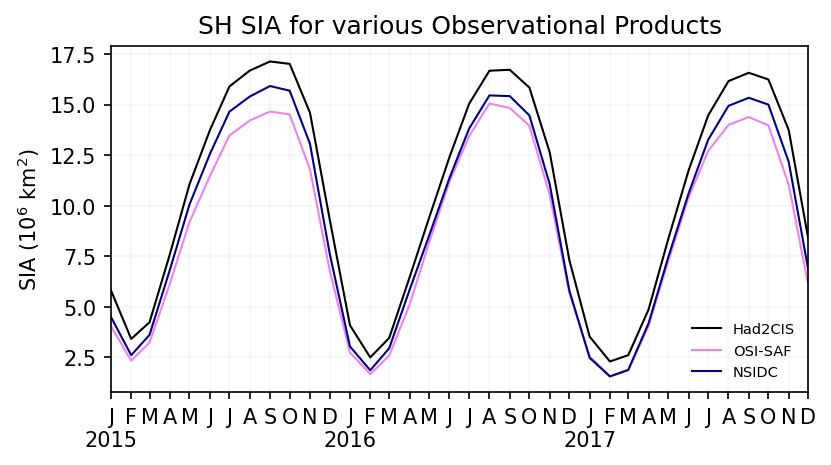

In [7]:
fix,ax=plt.subplots(1,1,figsize=(6,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
timeseries = [sia_Had2CIS, sia_OSISAF, sia_NSIDC]
colors = ['black', 'violet', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=1)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH SIA for various Observational Products")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=7,frameon=False)
#ax.axhline(16.5)
plt.show()

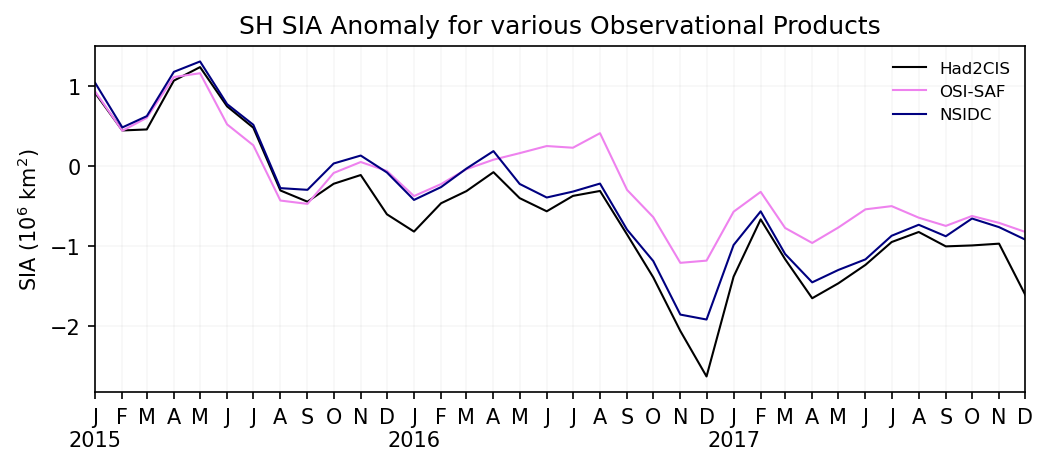

In [8]:
fix,ax=plt.subplots(1,1,figsize=(8,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
timeseries = [sia_anom_Had2CIS, sia_anom_OSISAF, sia_anom_NSIDC]
colors = ['black', 'violet', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIA'].plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=1)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH SIA Anomaly for various Observational Products")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=8,frameon=False)
#ax.axhline(16.5)
plt.show()

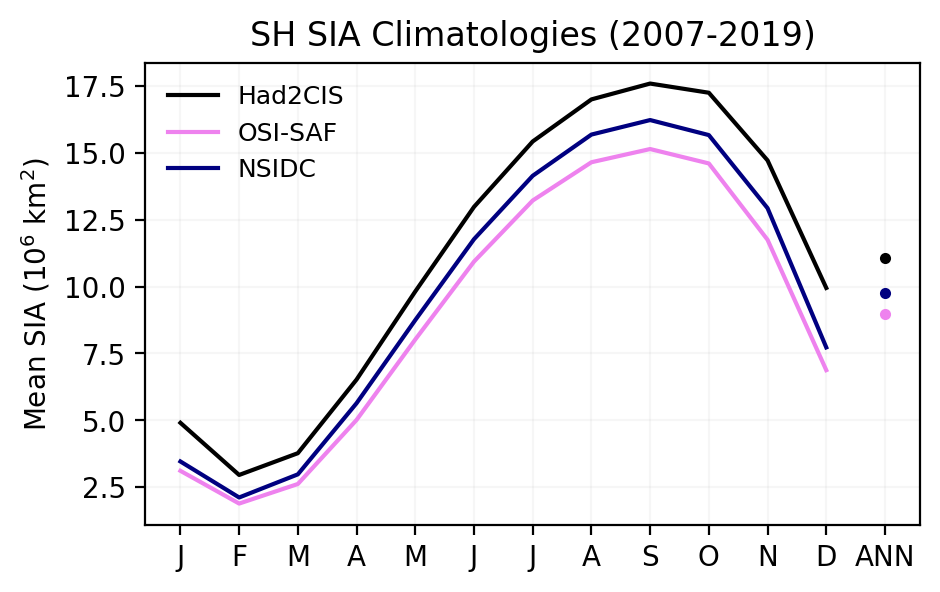

In [12]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sia_clim_Had2CIS, sia_clim_OSISAF, sia_clim_NSIDC]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'violet', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIA'].values,color=colors[i],label=labels[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"SH SIA Climatologies ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=9,frameon=False)
plt.show()

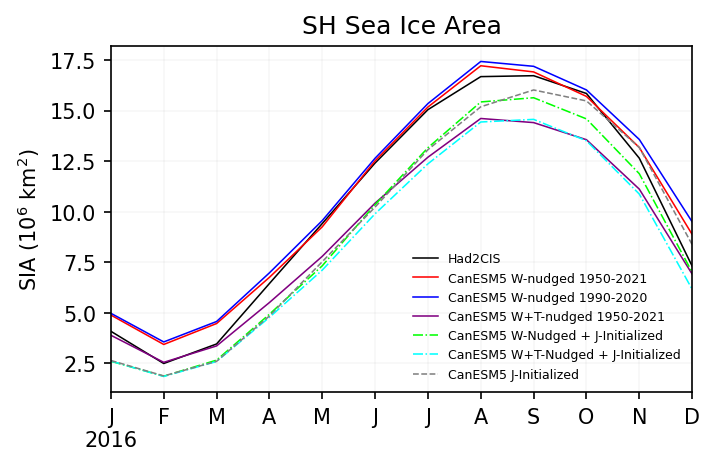

In [11]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2016,2016]
timeseries = [sia_Had2CIS,sia_CanESM5_wn1950, sia_CanESM5_wn1990, sia_CanESM5_wtn1950, sia_CanESM5_wn2016_init, sia_CanESM5_wtn2016_init, sia_CanESM5_init[0]['SIA']]
colors = ['black', 'red', 'blue', 'purple','lime','cyan','grey']
linestyles = ['-','-','-','-','-.','-.','--']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021','CanESM5 W-Nudged + J-Initialized','CanESM5 W+T-Nudged + J-Initialized','CanESM5 J-Initialized']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=0.75,legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Area")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()

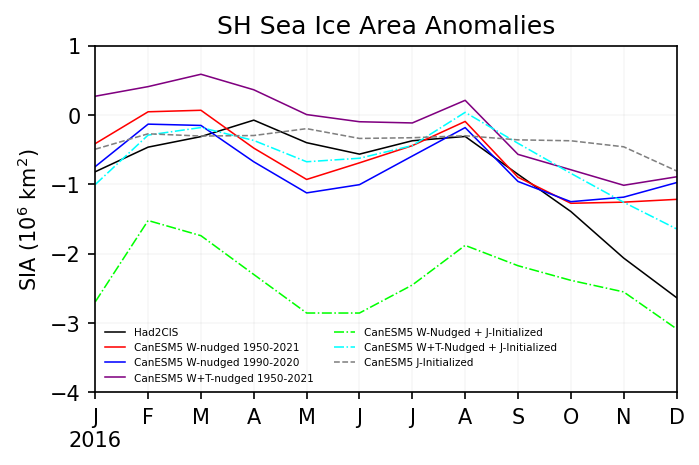

In [12]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2016,2016]
timeseries = [sia_anom_Had2CIS, sia_anom_CanESM5_wn1950, sia_anom_CanESM5_wn1990, sia_anom_CanESM5_wtn1950, sia_anom_CanESM5_wn2016_init, sia_anom_CanESM5_wtn2016_init, sia_anom_CanESM5_init[0]['SIA']]
colors = ['black', 'red', 'blue', 'purple','lime','cyan','grey']
linestyles = ['-','-','-','-','-.','-.','--']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021','CanESM5 W-Nudged + J-Initialized','CanESM5 W+T-Nudged + J-Initialized','CanESM5 J-Initialized']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=0.75,legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)")
ax.set_ylim(-4,1)
ax.set_title("SH Sea Ice Area Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=5,frameon=False,ncols=2)
plt.show()

### Monthly Anomalies

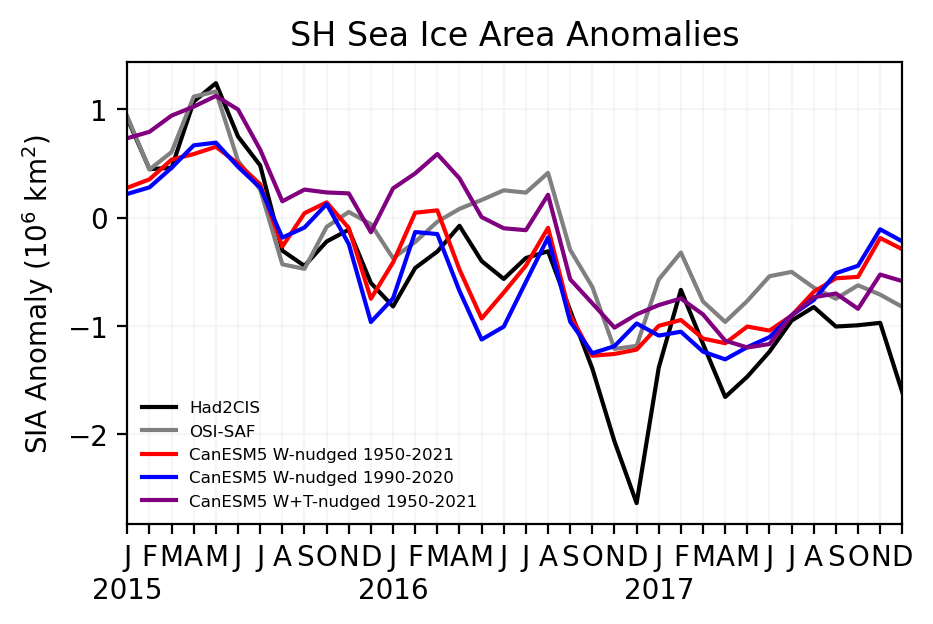

In [13]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
timeseries = [sia_anom_Had2CIS, sia_anom_OSISAF, sia_anom_CanESM5_wn1950, sia_anom_CanESM5_wn1990, sia_anom_CanESM5_wtn1950]
colors = ['black', 'grey', 'red', 'blue', 'purple']
labels = ['Had2CIS','OSI-SAF','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Area Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()

### Yearly Mean

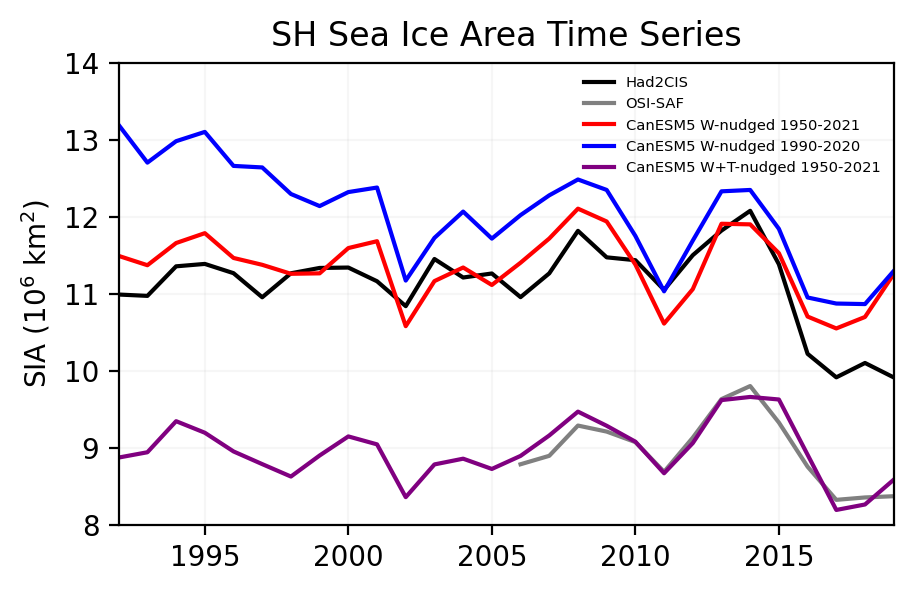

In [14]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [1992,2019]
timeseries = [sia_Had2CIS['SIA'].groupby('time.year').mean(), sia_OSISAF['SIA'].groupby('time.year').mean(), sia_CanESM5_wn1950['SIA'].groupby('time.year').mean(), sia_CanESM5_wn1990['SIA'].groupby('time.year').mean(), sia_CanESM5_wtn1950['SIA'].groupby('time.year').mean()]
colors = ['black', 'grey', 'red', 'blue', 'purple']
labels = ['Had2CIS','OSI-SAF','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['year']>=y0) & (data['year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
ax.set_xlim(y0,y1)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Area Time Series")
ax.set_ylim(8,14)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=5.3,frameon=False)
plt.show()

### Climatology

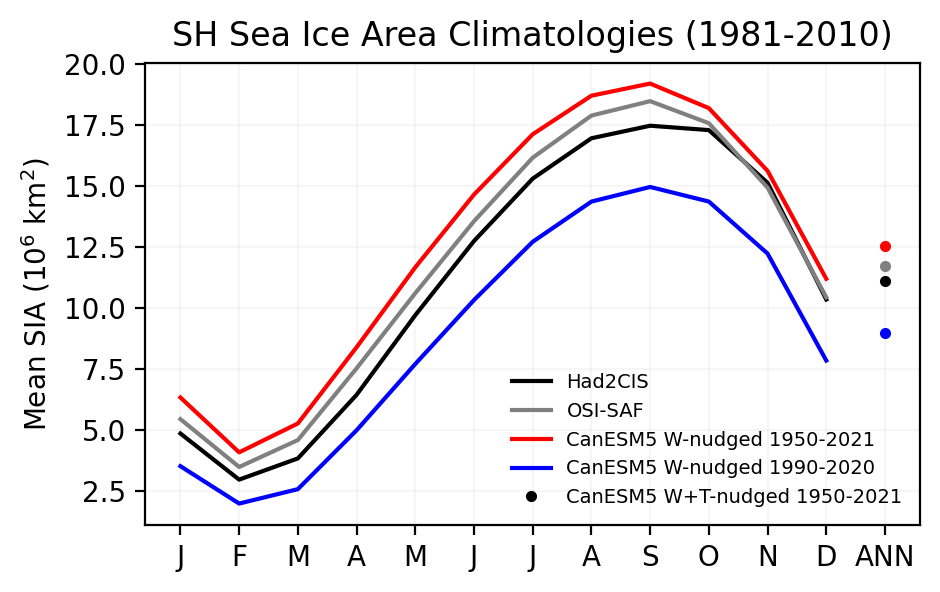

In [15]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sia_clim_Had2CIS, sia_clim_CanESM5_wn1950, sia_clim_CanESM5_wn1990, sia_clim_CanESM5_wtn1950]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIA'].values,color=colors[i],label=labels[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"SH Sea Ice Area Climatologies ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=7,frameon=False)
plt.show()

### Initialized CanESM5

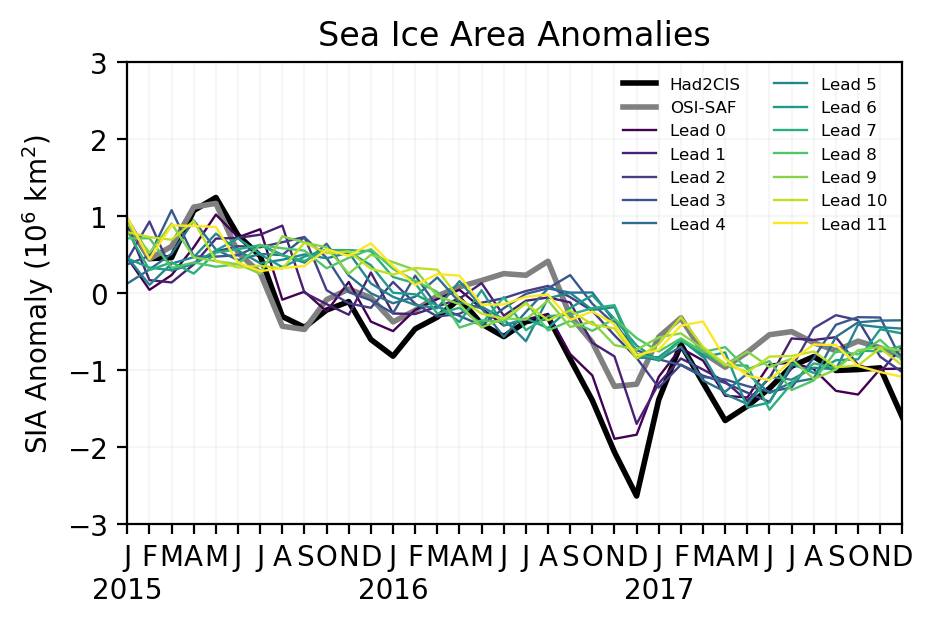

In [16]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','OSI-SAF','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
sia_anom_Had2CIS.where((sia_anom_Had2CIS['time.year']>=y0) & (sia_anom_Had2CIS['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='black')
sia_anom_OSISAF.where((sia_anom_OSISAF['time.year']>=y0) & (sia_anom_OSISAF['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='grey')
for i,data in enumerate(sia_anom_CanESM5_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=.85,color=colors[i])

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_ylim(-3,3)
ax.set_title("Sea Ice Area Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

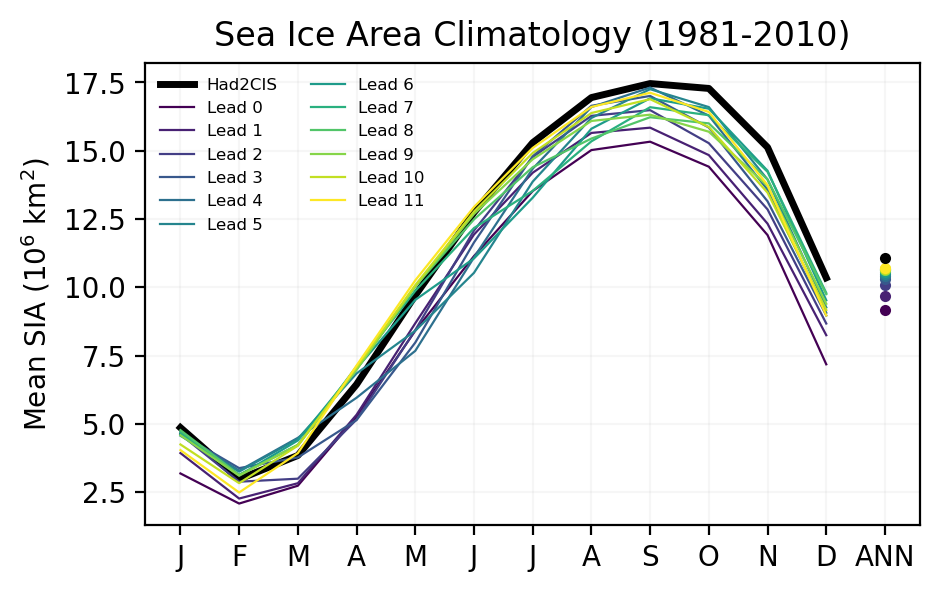

In [17]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
ax.plot(sia_clim_Had2CIS['SIA'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sia_clim_CanESM5_init):
    ax.plot(data['SIA'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sia_clim_CanESM5_init):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])
ax.plot(12,sia_clim_Had2CIS['overall_mean'].values,'.',color='black')

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"Sea Ice Area Climatology ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

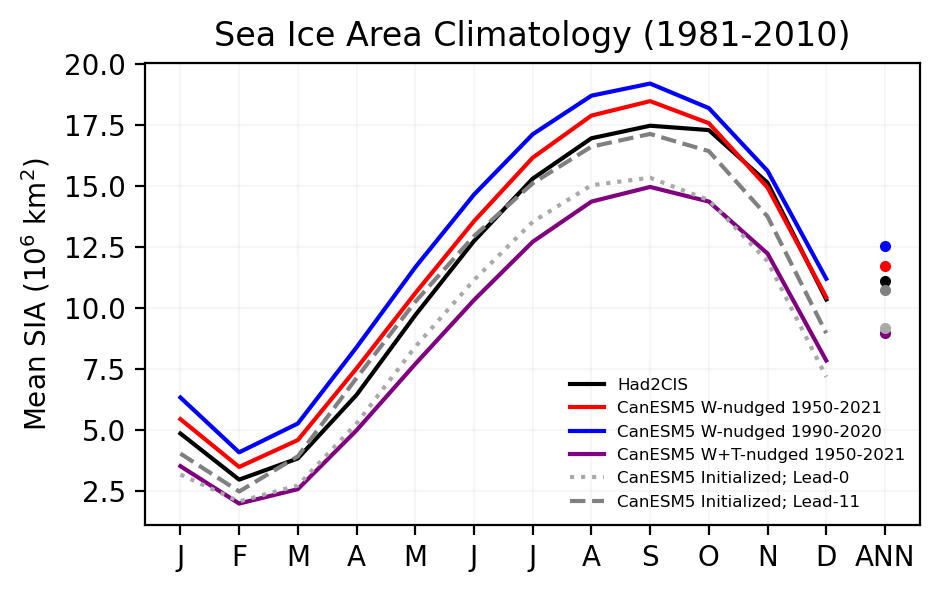

In [18]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sia_clim_Had2CIS, sia_clim_CanESM5_wn1950, sia_clim_CanESM5_wn1990, sia_clim_CanESM5_wtn1950, sia_clim_CanESM5_init[0], sia_clim_CanESM5_init[-1]]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'red', 'blue', 'purple','darkgrey','grey']
linestyles = ['-','-','-','-',':','--']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021','CanESM5 Initialized; Lead-0','CanESM5 Initialized; Lead-11']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIA'].values,color=colors[i],label=labels[i],linestyle=linestyles[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"Sea Ice Area Climatology ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()

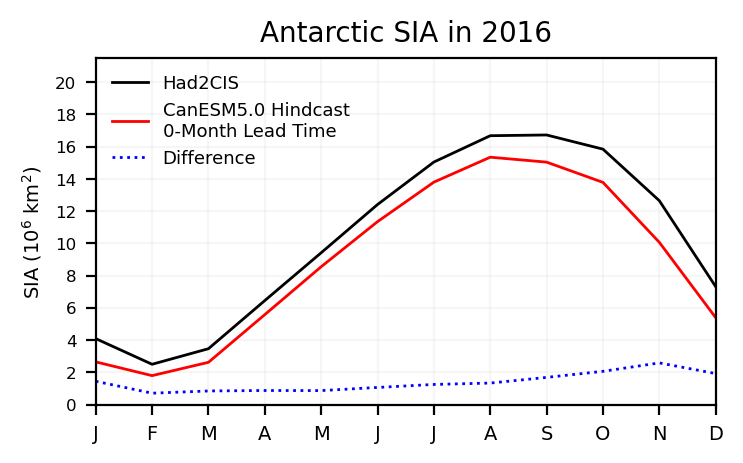

In [19]:
fix,ax=plt.subplots(1,1,figsize=(4,2.25),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2016,2016]
timeseries = [sia_Had2CIS, sia_CanESM5_init_lt[0]['SIA']]
labels = ['Had2CIS','CanESM5.0 Hindcast\n0-Month Lead Time','Difference']

# Plot the data
for i,data in enumerate(timeseries):
    if i == 0:
        data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color='black',linewidth=1,legend=True)
    else:
        data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color='red',linewidth=1,legend=True)
datadiff = timeseries[0] - timeseries[1]
datadiff.where((datadiff['time.year']>=y0) & (datadiff['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color='blue',ls=':',lw=1,legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
# for i,yr in enumerate(np.arange(y0,y1+1,1)):
#     xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_ylim(0,21.5)
ax.set_yticks(np.arange(0,21,2))
ax.set_yticklabels(np.arange(0,21,2),size=6)
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels, size=7)
ax.set_xlabel(None,size=15)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)", size=7)
ax.set_title("Antarctic SIA in 2016", size=10)
ax.grid(alpha=0.1,which='both')
ax.legend(labels,fontsize=6.5,frameon=False)
plt.show()

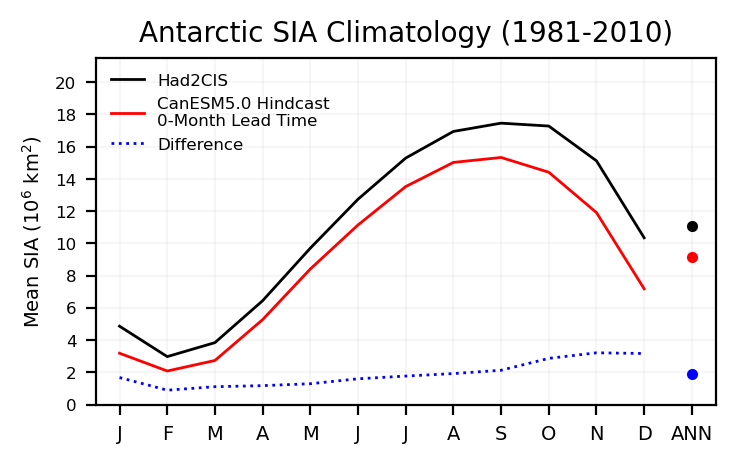

In [20]:
fix,ax=plt.subplots(1,1,figsize=(4,2.25),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sia_clim_Had2CIS, sia_clim_CanESM5_init[0], sia_clim_Had2CIS - sia_clim_CanESM5_init[0]]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'red', 'blue', 'purple','darkgrey','grey']
labels = ['Had2CIS','CanESM5.0 Hindcast\n0-Month Lead Time','Difference']
linestyles = ['-','-',':']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIA'].values,color=colors[i],label=labels[i],linestyle=linestyles[i],lw=1)
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_ylim(0,21.5)
ax.set_yticks(np.arange(0,21,2))
ax.set_yticklabels(np.arange(0,21,2),size=6)
ax.set_xlim(-0.5,12.5)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels, size=7)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)", size=7)
ax.set_title(f"Antarctic SIA Climatology ({daterange_clim[0]}-{daterange_clim[1]})", size=10)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()